<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Library-imports" data-toc-modified-id="Library-imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Library imports</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Pulling-sum-dates" data-toc-modified-id="Pulling-sum-dates-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pulling sum dates</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot</a></span></li></ul></div>

## Library imports
> Author: **Sam Stoltenberg**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Import Data
> Sourced from CDC
> https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm

In [2]:
df = pd.read_csv("Weekly_counts_of_deaths_by_jurisdiction_and_age_group.csv")
df.head()

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Age Group,Number of Deaths,Time Period,Type,Suppress,Note
0,Alabama,01/10/2015,AL,2015,1,25-44 years,67.0,2015-2019,Predicted (weighted),NaN,NaN
1,Alabama,01/17/2015,AL,2015,2,25-44 years,49.0,2015-2019,Predicted (weighted),NaN,NaN
2,Alabama,01/24/2015,AL,2015,3,25-44 years,55.0,2015-2019,Predicted (weighted),NaN,NaN
3,Alabama,01/31/2015,AL,2015,4,25-44 years,59.0,2015-2019,Predicted (weighted),NaN,NaN
4,Alabama,02/07/2015,AL,2015,5,25-44 years,47.0,2015-2019,Predicted (weighted),NaN,NaN


In [3]:
num_states = df['State Abbreviation'].nunique()
print(f"There are {num_states} states in the data")

There are 54 states in the data


## Pulling sum dates

In [4]:
sum_dates = {}
for date in df['Week Ending Date'].unique():
    sum_dates[date] = df.loc[df["Week Ending Date"] \
                             == date]["Number of Deaths"].sum()
sum_series = pd.Series(sum_dates)
sum_series.index = pd.to_datetime(sum_series.index)
sum_series

2015-01-10    248386.0
2015-01-17    245910.0
2015-01-24    235926.0
2015-01-31    230282.0
2015-02-07    230478.0
                ...   
2020-11-07    253425.0
2020-11-14    255491.0
2020-11-21    255897.0
2020-11-28    241452.0
2020-12-05    205328.0
Length: 309, dtype: float64

In [5]:
sum_series.index.min(), sum_series.index.max()

(Timestamp('2015-01-10 00:00:00'), Timestamp('2020-12-05 00:00:00'))

## Plot

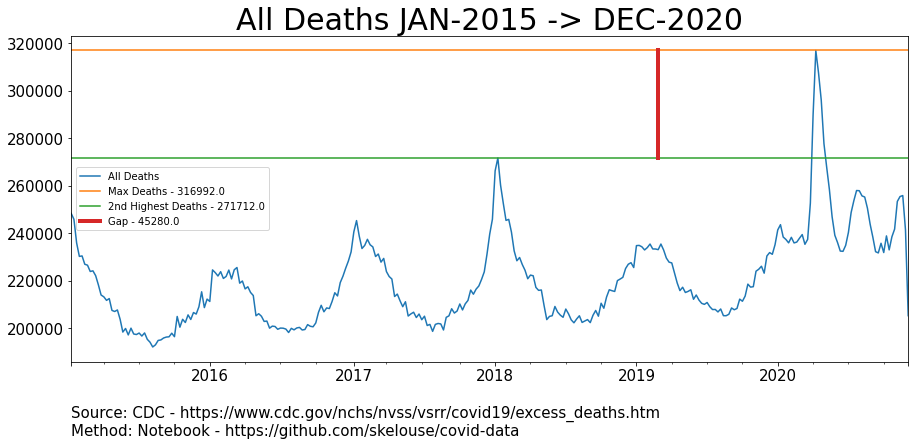

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))

# All Deaths
sum_series.plot(label='All Deaths', ax=ax)


# Max deaths line
max_1_date = sum_series.index[sum_series.argmax()]
max_1 = sum_series.max()
ax.axhline(max_1,
           label=f'Max Deaths - {max_1}',
           color='C1')


# Second max deaths line
sum_series_2017 = sum_series.iloc[sum_series.index < '1-1-2019']
max_2_date = sum_series_2017.index[sum_series_2017.argmax()]
max_2 = sum_series_2017.max()
ax.axhline(max_2,
           label=f'2nd Highest Deaths - {max_2}',
           color='C2')

# Gap
bottom, top = ax.get_ylim()
gap_top = max_1
gap_bottom = max_2

#     Scaling data for gap max and min locations
scaler = MinMaxScaler()
chart = np.array([[bottom, gap_bottom, gap_top, top]]).transpose()
chart = scaler.fit_transform(chart).reshape(4,)
gap_top = chart[2]
gap_bottom = chart[1]
gap_y = max_1_date + (max_2_date - max_1_date) / 2

gap = max_1 - max_2
ax.axvline(gap_y, ymax=gap_top, ymin=gap_bottom, label=f'Gap - {gap}',
            color='C3', linewidth=4)

# Styling
ax.tick_params(axis='both', which='major', labelsize=15)
source1 = "CDC - https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm"
source2 = "Notebook - https://github.com/skelouse/covid-data"
ax.set_xlabel(f'\nSource: {source1}\nMethod: {source2}', fontsize=15, loc='left')
ax.set_title('All Deaths JAN-2015 -> DEC-2020', fontsize=30)
ax.legend()

In [7]:
fig.tight_layout()
fig.savefig('plot.jpg', transparent=False)